In [4]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [5]:
api_key = 'hidden'
# channel_id = 'UCMiJRAwDNSNzuYeN2uWa0pA'
channel_ids = ['UCMiJRAwDNSNzuYeN2uWa0pA', # Mrwhosetheboss
               'UCBJycsmduvYEL83R_U4JriQ', # MKBHD
               'UCXuqSBlHAE6Xw-yeJA0Tunw', # Linus
               'UCVYamHliCI9rw1tHR1xbkfw', # Dave2D
               'UCvpfclapgcuJo0M_x65pfRw', # Beebom
               ]

youtube = build('youtube','v3', developerKey=api_key)

## Function to get channel statistics

In [6]:
def get_channel_stats(youtube, channel_ids):
  all_data = []

  request = youtube.channels().list(
      part='snippet,contentDetails, statistics',
      id= ','.join(channel_ids))
  response= request.execute()

  for i in range(len(response['items'])):
      data = dict(Channel_name = response['items'][i]['snippet']['title'],
              Subscribers = response['items'][i]['statistics']['subscriberCount'],
              Views = response['items'][i]['statistics']['viewCount'],
              Total_videos = response['items'][i]['statistics']['videoCount'],
              playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
      all_data.append(data)

  return all_data

In [7]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [8]:
channel_data = pd.DataFrame(channel_statistics)

In [9]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Mrwhosetheboss,16200000,4130518932,1597,UUMiJRAwDNSNzuYeN2uWa0pA
1,Beebom,2930000,701567015,1084,UUvpfclapgcuJo0M_x65pfRw
2,Dave2D,3610000,754796520,721,UUVYamHliCI9rw1tHR1xbkfw
3,Marques Brownlee,17400000,3693432826,1577,UUBJycsmduvYEL83R_U4JriQ
4,Linus Tech Tips,15400000,7275227401,6567,UUXuqSBlHAE6Xw-yeJA0Tunw


In [10]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])


In [11]:
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

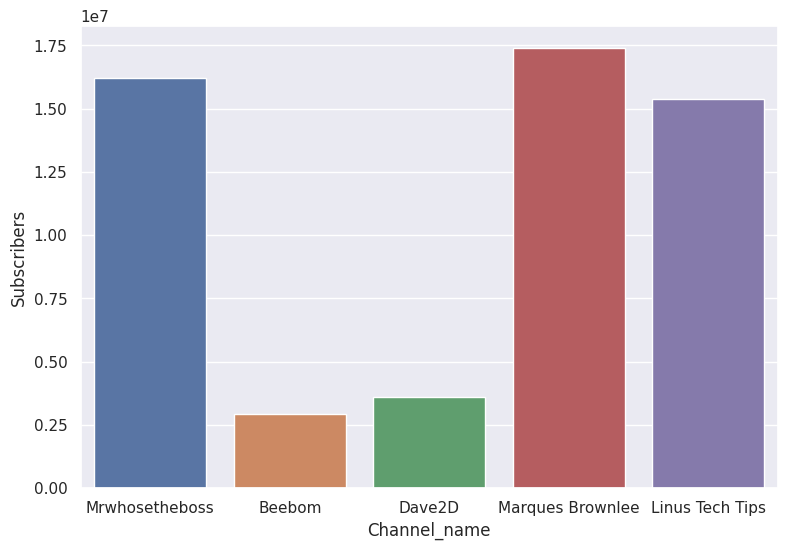

In [12]:
sns.set(rc={'figure.figsize':(9,6)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

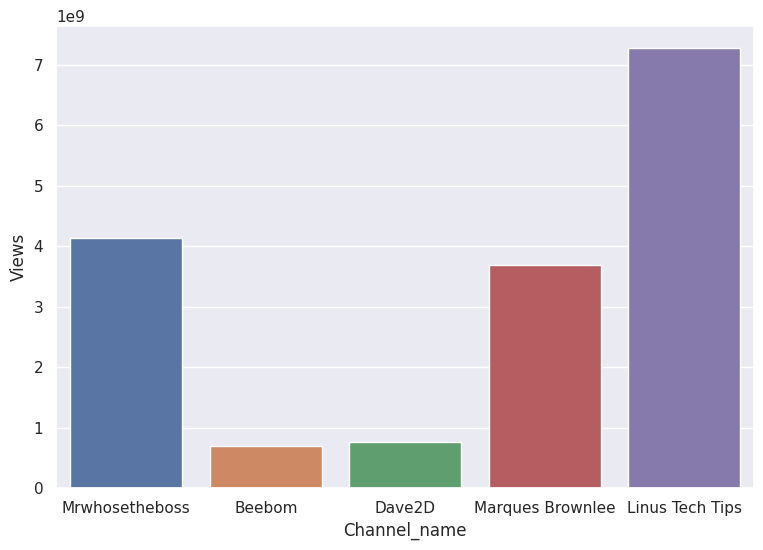

In [13]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

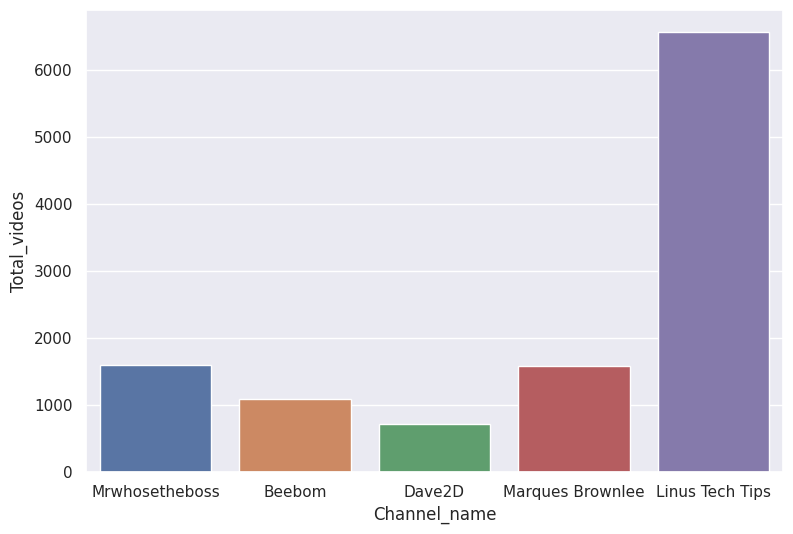

In [14]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

In [15]:
import numpy as np
x = channel_data['Total_videos']
y = channel_data['Views']

In [16]:
matrix = np.corrcoef(x, y)
print(matrix)

[[1.         0.88403119]
 [0.88403119 1.        ]]


## Function to get videos ids

In [17]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Linus Tech Tips', 'playlist_id'].iloc[0]

In [18]:
playlist_id

'UUXuqSBlHAE6Xw-yeJA0Tunw'

In [19]:
def get_video_ids(youtube, playlist_id):

  request = youtube.playlistItems().list(
      part='contentDetails',
      playlistId = playlist_id,
      maxResults=50
  )
  response = request.execute()

  video_ids = []

  for i in range(len(response['items'])):
    video_ids.append(response['items'][i]['contentDetails']['videoId'])

  next_page_token = response.get('nextPageToken')
  more_pages = True

  while more_pages:
    if next_page_token is None:
      more_pages = False
    else:
      request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults=50,
                        pageToken=next_page_token
                    )
      response = request.execute()

      for i in range(len(response['items'])):
          video_ids.append(response['items'][i]['contentDetails']['videoId'])


      next_page_token = response.get('nextPageToken')




  return video_ids

In [20]:
video_ids = get_video_ids(youtube, playlist_id)

In [21]:
video_ids

['Pl2qYxJRBR0',
 'qAE5KoyFEUo',
 '0cTpTMl8kFY',
 'jJlfOhQ_f1M',
 'qdoOwCXuePg',
 'WVycLhE45kg',
 'EwgZaSYuBLc',
 'hiwaxlttWow',
 '5wBxYQdN96s',
 '1s8Kdc6AGT8',
 'aKRyZelOp7Y',
 'XwO2qJ1cGoE',
 'geb_gk1XXyA',
 'rnIeknursww',
 'uz-P7grAg_8',
 'i_FFJj_s1Rs',
 'zKJhPOtLXo8',
 'wjO6OLmZB9A',
 'z9AmHckdDWI',
 'JjHCiXQqirg',
 't036sCrXnFc',
 'OtcSNiU9Zb8',
 'rh7oegwCyRk',
 'QALLc1jQrOE',
 'cLGcGnGJvL0',
 'Jy6Qk_bO3Qw',
 'aDDZ50U_cEM',
 '0T52v3WlFBY',
 'RGZFb2PlPlo',
 '0EtgwIajVqs',
 '51foBSsRpJk',
 'u54Kf3zxDso',
 'VyI-2c9KI1I',
 'uO6DMWHK_HA',
 '-eqjP-aFBPA',
 'FdbvrqC6lOY',
 '8N3sFRR9-OE',
 '-n8N62DeNDU',
 'buLyy7x2dcQ',
 'H5e3ALqgpaA',
 'P32OKr74NPQ',
 'nfCUTZWwlvo',
 'DzLdFmPncms',
 'diUOdC2tYzM',
 'QwIlhuR_N2g',
 'FLG08-xJGyM',
 'yI7fV88T8A0',
 'ZGy2kkWOxig',
 'UMO52N2vfk0',
 '_CxkmtBqGn8',
 'O0srjKOOR4g',
 'tiCc6eez7FA',
 'cPUbFteFL5Q',
 'YBTARvcFZ1A',
 'P2hey3mNnN0',
 'V52LbPoMnDE',
 'xa5dFAPpUBA',
 'DRHcTfTfEp0',
 'wl2IugfRMDk',
 '6oiIMUrbilw',
 'VK6GYwPTcw4',
 '7nXVJBGowmY',
 'i8qkqf

## Function to get video details

In [63]:
def get_video_details(youtube, video_ids):
  all_video_stats = []
  for i in range(0, len(video_ids), 50):
      request = youtube.videos().list(
          part='snippet,statistics',
          id=','.join(video_ids[i:i+50])
      )
      response = request.execute()
      all_tags = []

      for video in response['items']:
          video_stats = dict(Title = video['snippet']['title'],
                           Published_date = video['snippet']['publishedAt'],
                          #  Views = video['statistics']['viewCount'],
                           Likes = video['statistics']['likeCount'],
                          #  Comments = video['statistics']['commentCount']
                           )
          if 'tags' in video['snippet']:
            video_stats['Tags'] = video['snippet']['tags']
          else:
            video_stats['Tags'] = []

          all_video_stats.append(video_stats)

  return all_video_stats

In [64]:
video_details = get_video_details(youtube, video_ids)

In [65]:
video_data = pd.DataFrame(video_details)

In [66]:
video_data

,Title,Published_date,Likes,Tags
0,One Of The Shows Of All Time - WAN Show August...,2023-08-26T07:41:16Z,24146,"[pcmr, building, competition, gamers, how to, ..."
1,Here's the plan.,2023-08-26T04:48:18Z,167293,[]
2,What do we do now?,2023-08-16T10:33:44Z,188466,[]
3,Why is EVERYONE Buying this Mic??,2023-08-15T00:34:28Z,33024,"[mic, streaming mic, best mic for gaming, best..."
4,"I was told this was simple - AMD $5,000 Ultima...",2023-08-13T17:21:57Z,59503,"[AMD, Ultimate Tech upgrade, Ryzen, 7800X3D, P..."
...,...,...,...,...
6274,Personal Grooming with a USB Shaver (Linus Tec...,2008-12-13T02:00:21Z,3380,"[USB, shaver, Syba, rechargable]"
6275,Lenovo Ideapad S10 Netbook Unboxing and Overview,2008-12-10T01:02:41Z,5308,"[lenovo, ideapad, s10, unboxing, netbook, subn..."
6276,eVGA X58 Motherboard Overview (Linus Tech Tips...,2008-11-29T03:15:06Z,2654,"[evga, x58, motherboard, sli, linus, tech, tip..."
6277,Asus Rampage 2 Extreme Motherboard (Linus Tech...,2008-11-27T19:47:26Z,4144,"[asus, motherboard, rampage, extreme, computer..."


In [73]:
mostliked_videos = video_data.sort_values(by='Likes', ascending=False).head(10)

In [74]:
mostliked_videos

,Title,Published_date,Likes,Tags,Month
563,These Gloves let you FEEL in VR! #SHORTS,2022-04-14,643616,"[vr, quest 2, virtual reality, full body track...",Apr
1420,I've been thinking of retiring.,2020-01-23,540606,[],Jan
453,We built the world's ugliest PC! #SHORTS #noct...,2022-07-13,513344,"[fans, cooling, ugly, gpu, graphics card, part...",Jul
533,I bet your Xbox doesn't look like this! #SHORTS,2022-05-08,484302,"[xbox sereies x, development kit, xbox series ...",May
95,I'm Stepping Down..,2023-05-19,479248,"[linus steps down as ceo, ltt getting a ceo, w...",May
1561,Building a PC... using only Wish.com,2019-09-25,467564,"[wish.com, wish, gaming, pc, build, guide, ama...",Sep
441,Apple changed their mind... #SHORTS #apple #ri...,2022-07-21,452588,"[genius bar, mac, iphone, repair, self repair,...",Jul
161,My Channel Was Deleted Last Night,2023-03-24,448152,"[hacked, google, youtube, elon, musk, tesla, s...",Mar
1500,My most painful PC Build... - ROG Rig Reboot ...,2019-11-20,436505,"[PC, Gaming, ASUS, ROG, Republic of Gamers, Bu...",Nov
580,This compact keyboard is great for gaming! #SH...,2022-04-01,425191,"[april fools, corsair, 1% keyboard, compact, t...",Apr


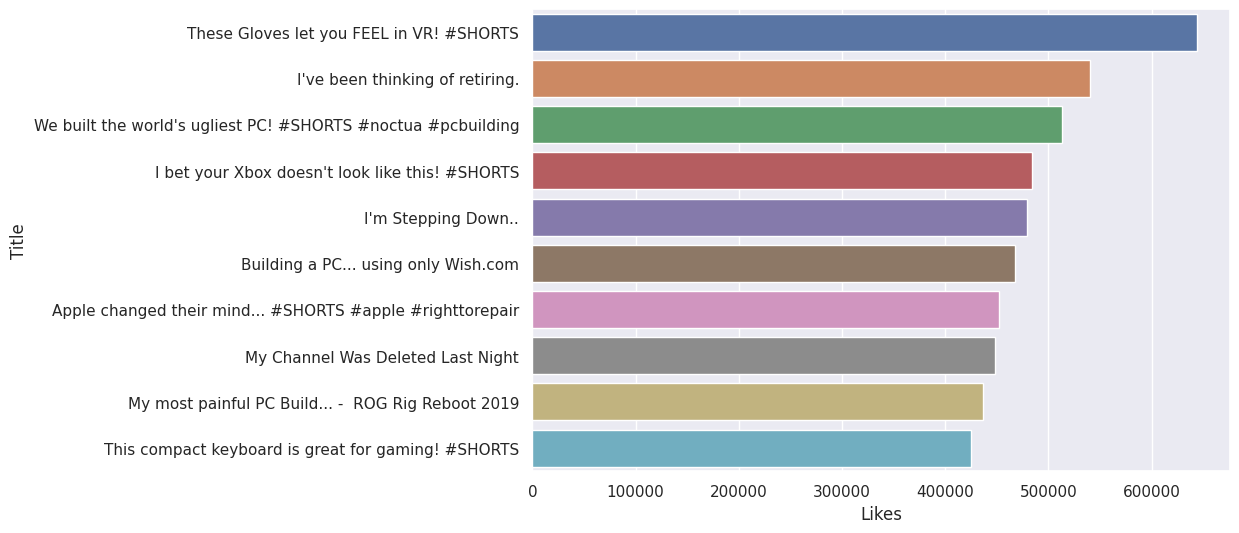

In [48]:
ax1 = sns.barplot(x='Likes', y='Title', data=mostliked_videos)

In [69]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Likes'] = pd.to_numeric(video_data['Likes'])

In [70]:
video_data.dtypes

Title             object
Published_date    object
Likes              int64
Tags              object
dtype: object

In [71]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [72]:
video_data

,Title,Published_date,Likes,Tags,Month
0,One Of The Shows Of All Time - WAN Show August...,2023-08-26,24146,"[pcmr, building, competition, gamers, how to, ...",Aug
1,Here's the plan.,2023-08-26,167293,[],Aug
2,What do we do now?,2023-08-16,188466,[],Aug
3,Why is EVERYONE Buying this Mic??,2023-08-15,33024,"[mic, streaming mic, best mic for gaming, best...",Aug
4,"I was told this was simple - AMD $5,000 Ultima...",2023-08-13,59503,"[AMD, Ultimate Tech upgrade, Ryzen, 7800X3D, P...",Aug
...,...,...,...,...,...
6274,Personal Grooming with a USB Shaver (Linus Tec...,2008-12-13,3380,"[USB, shaver, Syba, rechargable]",Dec
6275,Lenovo Ideapad S10 Netbook Unboxing and Overview,2008-12-10,5308,"[lenovo, ideapad, s10, unboxing, netbook, subn...",Dec
6276,eVGA X58 Motherboard Overview (Linus Tech Tips...,2008-11-29,2654,"[evga, x58, motherboard, sli, linus, tech, tip...",Nov
6277,Asus Rampage 2 Extreme Motherboard (Linus Tech...,2008-11-27,4144,"[asus, motherboard, rampage, extreme, computer...",Nov


In [49]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [50]:
videos_per_month

,Month,size
0,Apr,540
1,Aug,495
2,Dec,507
3,Feb,472
4,Jan,748
5,Jul,468
6,Jun,557
7,Mar,505
8,May,491
9,Nov,485


In [51]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [52]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [53]:
videos_per_month = videos_per_month.sort_index()

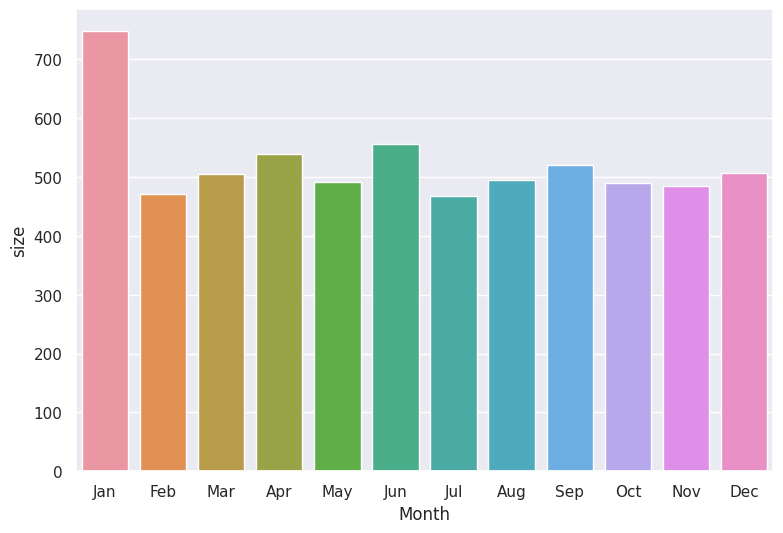

In [54]:
ax = sns.barplot(x='Month', y='size', data=videos_per_month)